In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

### **Data Preparation:**

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving water_classification_model.csv to water_classification_model (1).csv


In [ ]:
data = pd.read_csv('water_classification_model.csv')
df = pd.DataFrame(data)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.shape

(3276, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df.nunique()

,0
ph,2785
Hardness,3276
Solids,3276
Chloramines,3276
Sulfate,2495
Conductivity,3276
Organic_carbon,3276
Trihalomethanes,3114
Turbidity,3276
Potability,2


In [ ]:
df['Potability'].value_counts()

,count
Potability,
0,1998
1,1278


[Text(0.5, 1.0, 'WATER POTABILITY DISTRIBUTION')]

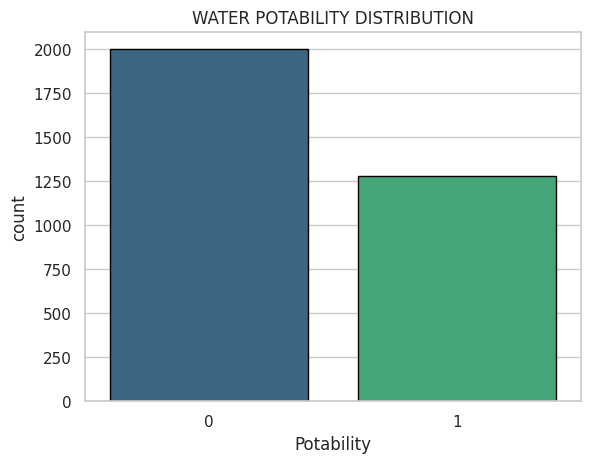

In [ ]:
sns.set(style='whitegrid')

sns.countplot(data=df, x='Potability', palette='viridis', edgecolor='black').set(title="WATER POTABILITY DISTRIBUTION")

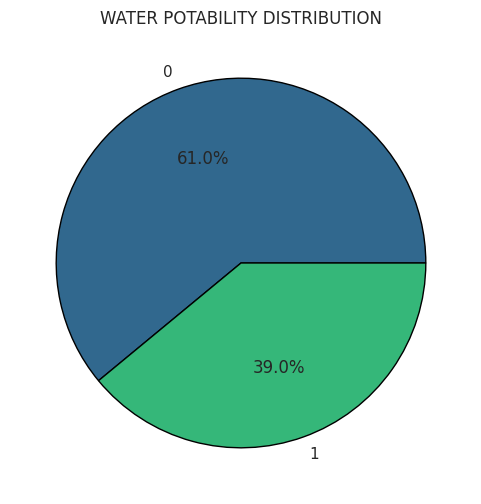

In [ ]:
sns.set(style='whitegrid')

ax = df['Potability'].value_counts().plot(kind='pie',
                                           colors=sns.color_palette('viridis', n_colors=len(df['Potability'].value_counts())),
                                           figsize=(6, 6),
                                           title="WATER POTABILITY DISTRIBUTION",
                                           autopct='%1.1f%%')
ax.set_ylabel('')
for wedge in ax.patches:
    wedge.set_edgecolor('black')

plt.show()

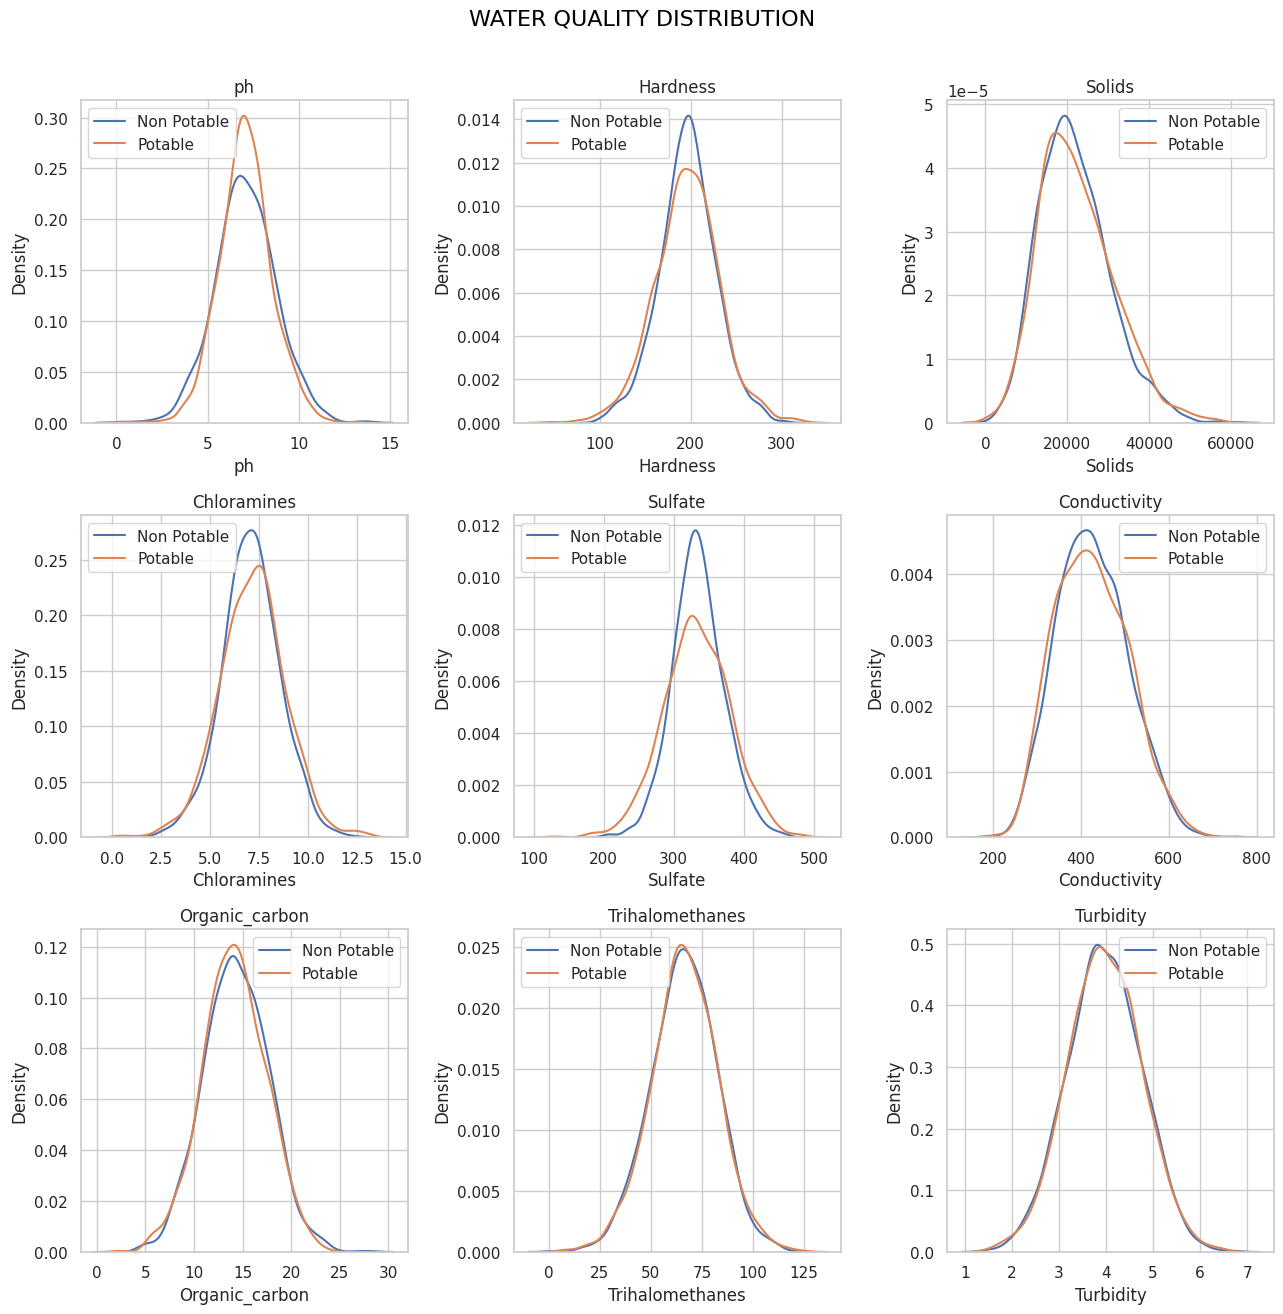

In [ ]:
non_potable = df[df['Potability'] == 0]
potable = df[df['Potability'] == 1]

fig, axes = plt.subplots(3, 3, figsize=(13, 13))
axes = axes.flatten()

for ax, col in zip(axes, df.columns[:9]):
    ax.set_title(col)
    sns.kdeplot(non_potable[col], label='Non Potable', ax=ax)
    sns.kdeplot(potable[col], label='Potable', ax=ax)
    ax.legend()

plt.suptitle("WATER QUALITY DISTRIBUTION", y=1.01, size=16, color='black')
plt.tight_layout()

In [ ]:
df.drop('Potability', axis=1).skew()

,0
ph,0.025630
Hardness,-0.039342
Solids,0.621634
Chloramines,-0.012098
Sulfate,-0.035947
Conductivity,0.264490
Organic_carbon,0.025533
Trihalomethanes,-0.083031
Turbidity,-0.007817


In [ ]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


In [ ]:
fig = px.imshow(df.corr(),
                color_continuous_scale='RdBu',
                title="WATER QUALITY HEAT MAP",
                labels=dict(x='Features (x)', y='Features (y)', color='corr'))

fig.update_layout(title_font_size=16)

fig.show()

In [ ]:
df.corr().abs()['Potability'].sort_values(ascending=False)

,Potability
Potability,1.000000
Solids,0.033743
Organic_carbon,0.030001
Chloramines,0.023779
Sulfate,0.023577
Hardness,0.013837
Conductivity,0.008128
Trihalomethanes,0.007130
ph,0.003556
Turbidity,0.001581


Text(0.5, 1.01, 'WATER QUALITY PAIR-PLOT')

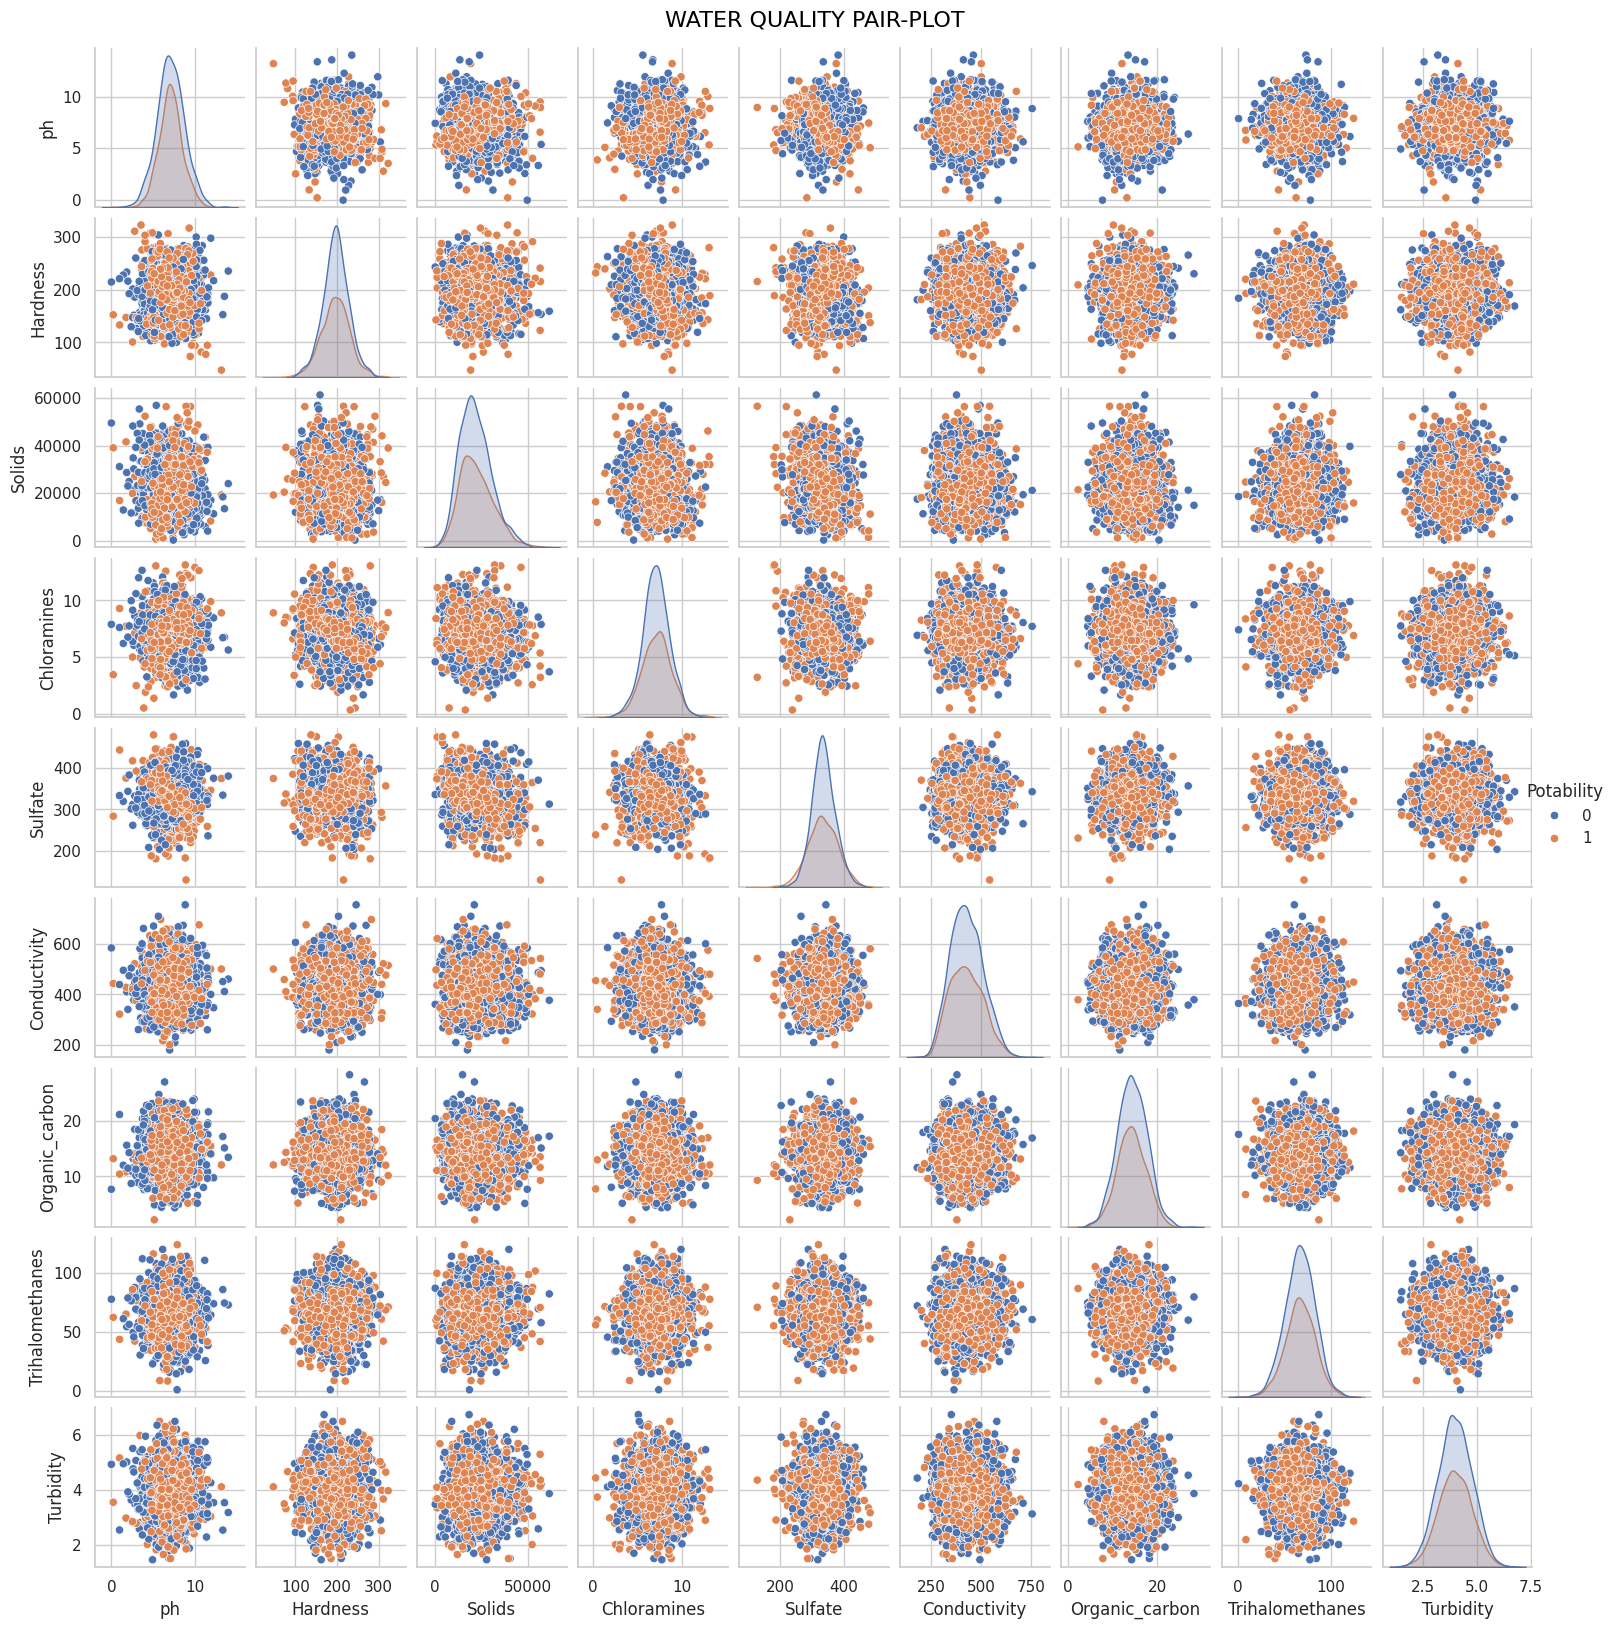

In [ ]:
ax = sns.pairplot(df, hue='Potability', diag_kind='kde', kind='scatter')
ax.fig.set_size_inches(16, 16)
ax.fig.suptitle("WATER QUALITY PAIR-PLOT", y=1.01, size=16, color='black')

Text(0.5, 1.01, 'WATER QUALITY BOX-PLOT')

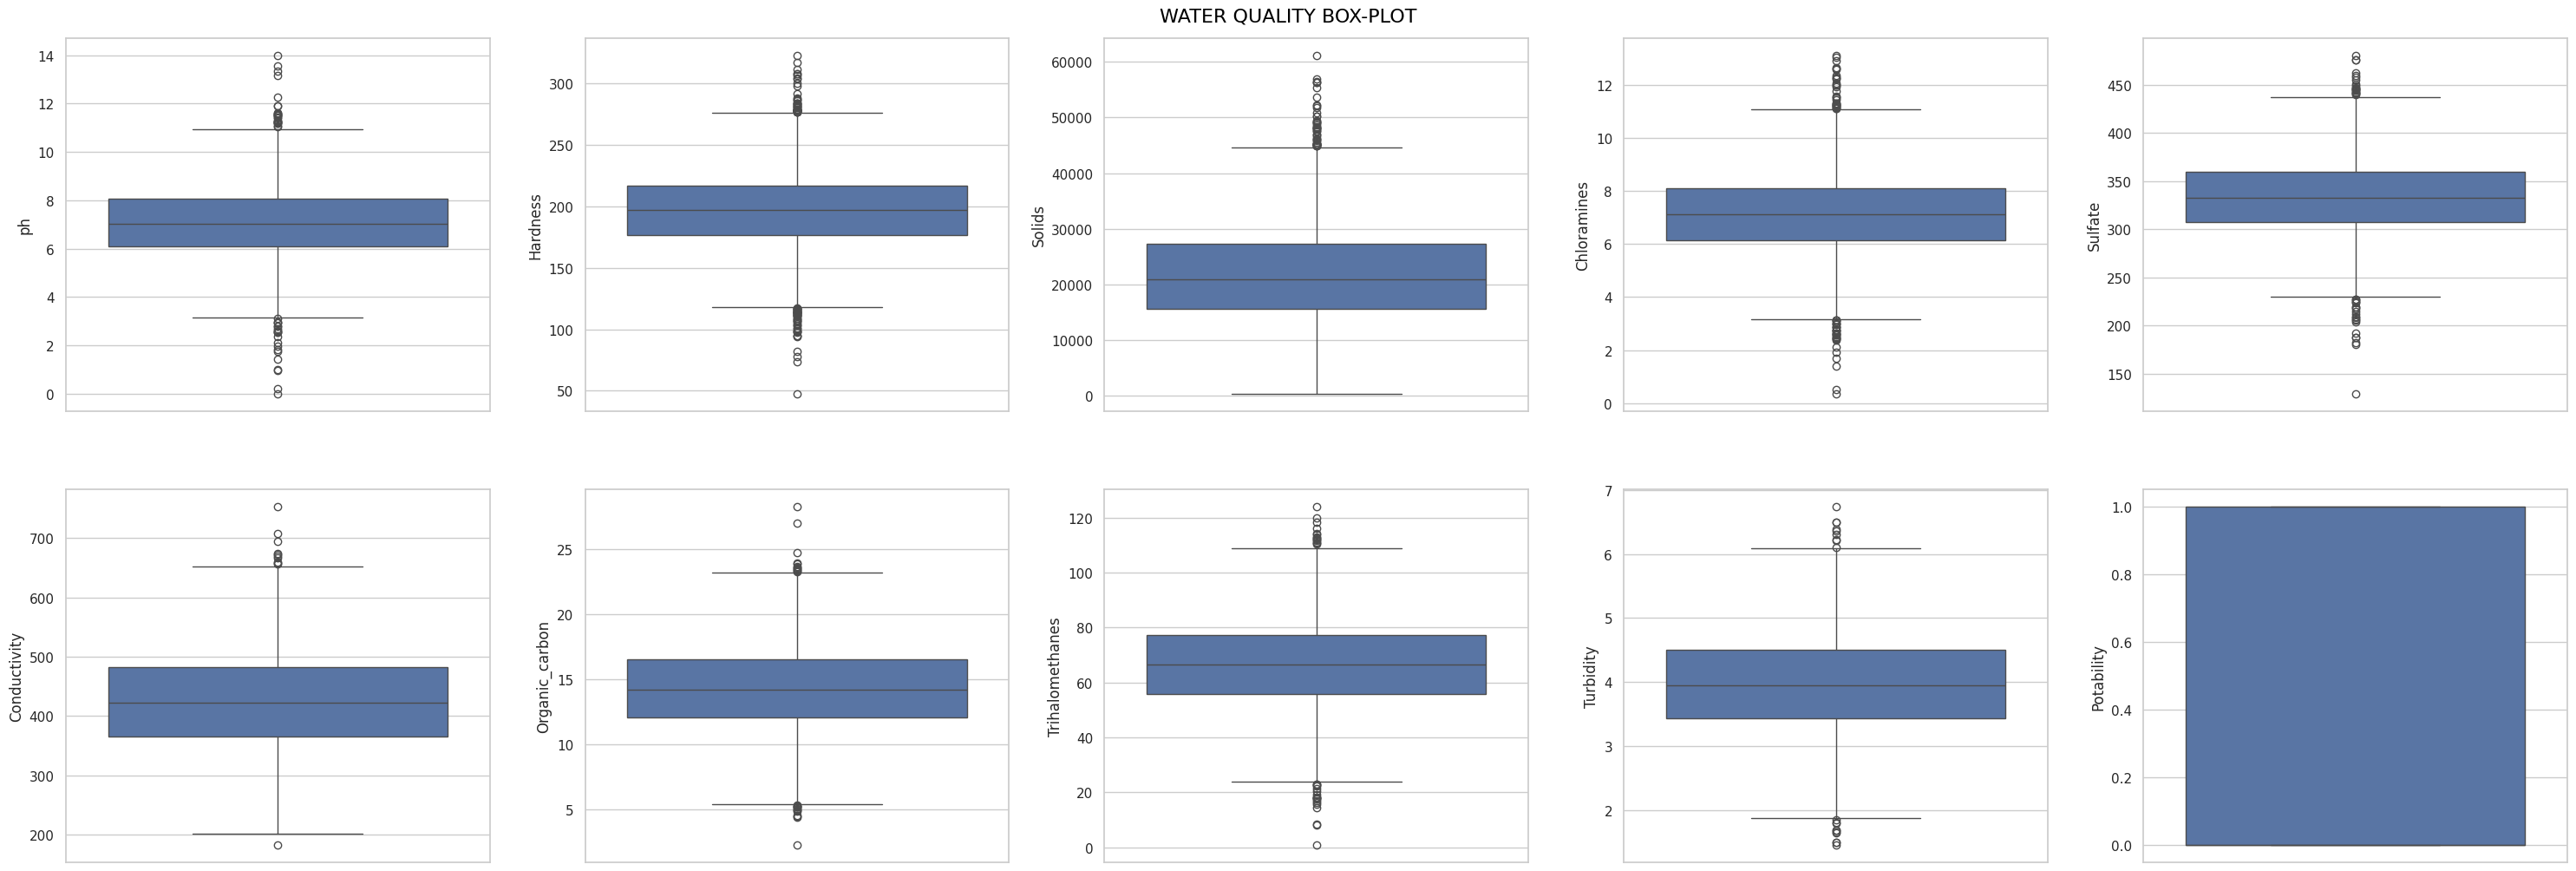

In [ ]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(30, 10))
for index, attributeCol in enumerate(df.columns):
    sns.boxplot(y=attributeCol, data=df, ax=ax.flatten()[index])

plt.tight_layout(pad=1.5, w_pad=1.5, h_pad=5.0)
plt.suptitle("WATER QUALITY BOX-PLOT", y=1.01, size=16, color='black')

### **Handling Missing Data:**

In [ ]:
df.isna().any().any()

True

In [ ]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [ ]:
missing_data = df.isnull().mean() * 100
fig = px.bar(missing_data,
             title="MISSING DATA IN PERCENTAGES",
             labels={'index': 'Features', 'value': 'Percentage of Missing Values'},
             color=missing_data,
             color_continuous_scale='RdBu')

fig.update_layout(
    xaxis_title='Features (x)',
    yaxis_title='Percentage of Missing Values (y)',
    title_font_size=16,
)

fig.show()

In [ ]:
df.isnull().mean() * 100

,0
ph,14.987790
Hardness,0.000000
Solids,0.000000
Chloramines,0.000000
Sulfate,23.840049
Conductivity,0.000000
Organic_carbon,0.000000
Trihalomethanes,4.945055
Turbidity,0.000000
Potability,0.000000


In [ ]:
df[df['Potability'] == 0][['ph', 'Sulfate', 'Trihalomethanes']].mean()

,0
ph,7.085378
Sulfate,334.564290
Trihalomethanes,66.303555


In [ ]:
df[df['Potability'] == 1][['ph', 'Sulfate', 'Trihalomethanes']].mean()

,0
ph,7.073783
Sulfate,332.566990
Trihalomethanes,66.539684


In [ ]:
df1 = df.copy()
df1[['ph', 'Sulfate', 'Trihalomethanes']] = df1[['ph', 'Sulfate', 'Trihalomethanes']].fillna(df1[['ph', 'Sulfate', 'Trihalomethanes']].mean())

In [ ]:
df1.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


### **Handling Anomalies:**

In [ ]:
from scipy import stats

df_water = df1.copy()
df_water = df_water[(np.abs(stats.zscore(df_water)) <= 3).all(axis=1)]

In [ ]:
df_water.shape

(3128, 10)

Text(0.5, 1.01, 'WATER QUALITY BOX-PLOT (POST OUTLIER REMOVAL)')

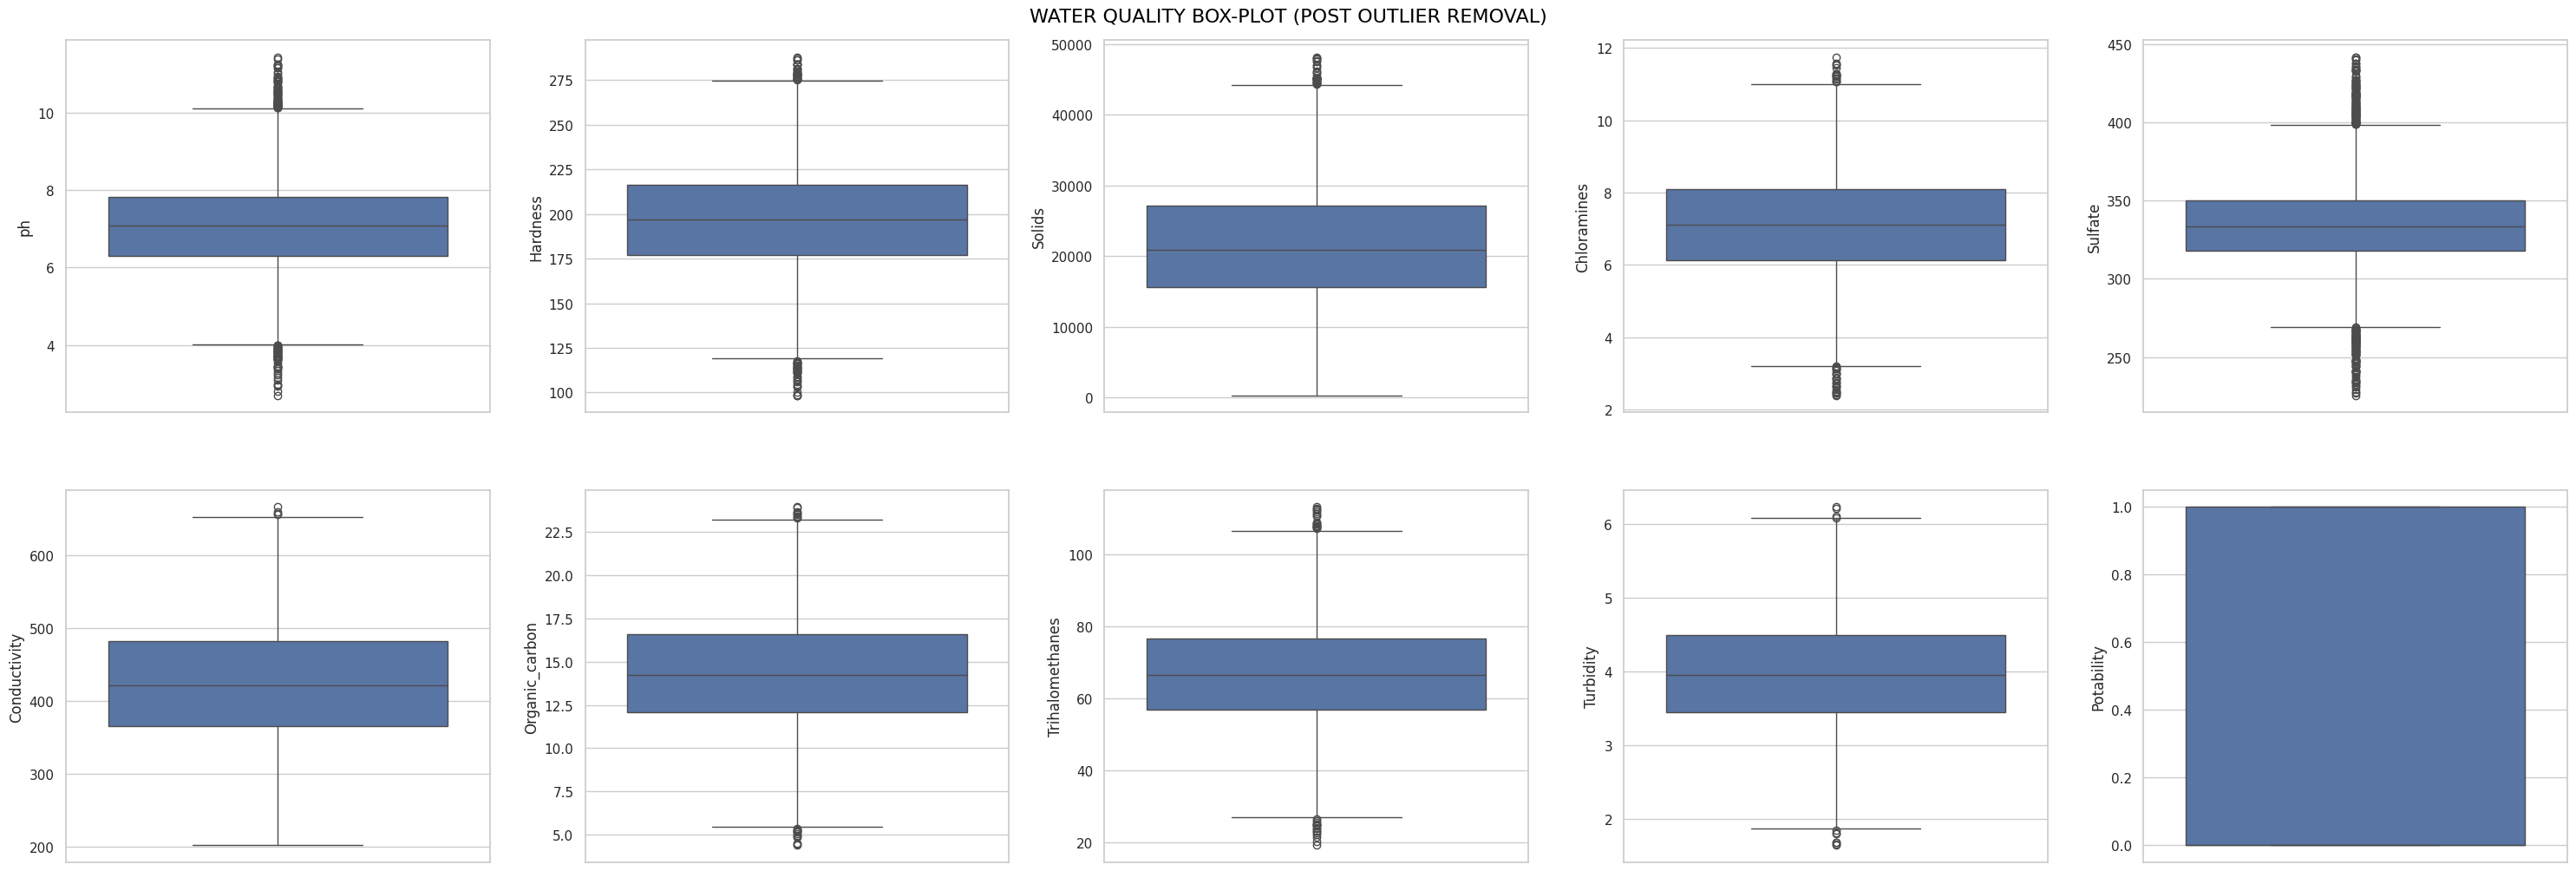

In [ ]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(30, 10))
index = 0
ax = ax.flatten()

for attributeCol, value in df_water.items():
    sns.boxplot(y=attributeCol, data=df_water, ax=ax[index])
    index += 1

plt.tight_layout(pad=1.5, w_pad=1.5, h_pad=5.0)
plt.suptitle("WATER QUALITY BOX-PLOT (POST OUTLIER REMOVAL)", y=1.01, size=16, color='black')

### **Handling Class Imbalance:**

In [ ]:
count_class_0, count_class_1 = df_water.Potability.value_counts()

df_class_0 = df_water[df_water['Potability'] == 0]
df_class_1 = df_water[df_water['Potability'] == 1]

RANDOM OVER-SAMPLING:
Potability
0    1930
1    1930
Name: count, dtype: int64


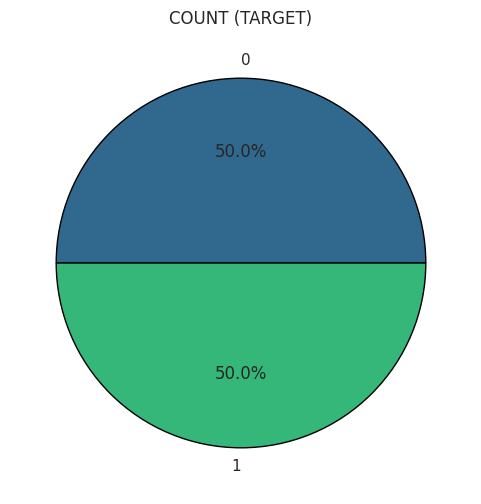

In [ ]:
sns.set(style='whitegrid')

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print("RANDOM OVER-SAMPLING:")
print(df_test_over.Potability.value_counts())

ax = df_test_over['Potability'].value_counts().plot(kind='pie',
                                                   colors=sns.color_palette('viridis', n_colors=len(df_test_over['Potability'].value_counts())),
                                                   figsize=(6, 6),
                                                   title="COUNT (TARGET)",
                                                   autopct='%1.1f%%')
ax.set_ylabel('')
for wedge in ax.patches:
    wedge.set_edgecolor('black')

plt.show()

### **Analyzing Correlation using ANOVA:**

In [ ]:
def FunctionAnova(inpData, TargetVariable, attributeList):
    from scipy.stats import f_oneway
    SelectedPredictors = []

    for predictor in attributeList:
        CategoryGroupLists = inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        if AnovaResults[1] < 0.05:
            print(f"{predictor} is correlated with {TargetVariable}, P-Value: {AnovaResults[1]}")
            SelectedPredictors.append(predictor)
        else:
            print(f"{predictor} is NOT correlated with {TargetVariable}, P-Value: {AnovaResults[1]}")

    return SelectedPredictors

In [ ]:
attributeColList = [
    'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
    'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity'
]

FunctionAnova(
    inpData=df_water,
    TargetVariable='Potability',
    attributeList=attributeColList
)

ph is NOT correlated with Potability, P-Value: 0.7393007692679345
Hardness is NOT correlated with Potability, P-Value: 0.5152019551100953
Solids is NOT correlated with Potability, P-Value: 0.24376029399252427
Chloramines is NOT correlated with Potability, P-Value: 0.38895878135633166
Sulfate is NOT correlated with Potability, P-Value: 0.8121224592001397
Conductivity is NOT correlated with Potability, P-Value: 0.67278748123374
Organic_carbon is NOT correlated with Potability, P-Value: 0.29594883023494456
Trihalomethanes is NOT correlated with Potability, P-Value: 0.6801397413373995
Turbidity is NOT correlated with Potability, P-Value: 0.8294778118624652


[]

### **Data Preparation - Splitting and Scaling:**

In [ ]:
from sklearn.model_selection import train_test_split

X = df_test_over.drop('Potability', axis=1)
y = df_test_over['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [ ]:
print('X_train:', X_train.shape, '\ny_train:', y_train.shape)
print('X_test:', X_test.shape, '\ny_test:', y_test.shape)

X_train: (3088, 9) 
y_train: (3088,)
X_test: (772, 9) 
y_test: (772,)


### **Dimensionality Reduction through PCA:**

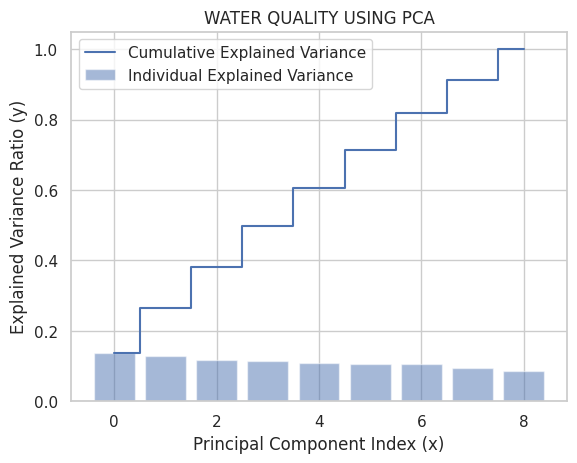

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()

X_train_pca = pca.fit_transform(X_train)
exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0, len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual Explained Variance')
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid', label='Cumulative Explained Variance')
plt.xlabel('Principal Component Index (x)')
plt.ylabel('Explained Variance Ratio (y)')
plt.title("WATER QUALITY USING PCA")
plt.legend(loc='best')
plt.show()

### **Model Training - First Iteration:**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import precision_score, accuracy_score, mean_absolute_error, mean_squared_error, confusion_matrix, classification_report, recall_score, f1_score

### 1. **Logistic Regression - First Iteration:**

In [ ]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogReg_pred = LogReg.predict(X_test)

LogReg_acc = accuracy_score(y_test, LogReg_pred)
LogReg_mae = mean_absolute_error(y_test, LogReg_pred)
LogReg_mse = mean_squared_error(y_test, LogReg_pred)
LogReg_rmse = np.sqrt(LogReg_mse)

LogReg_precision = precision_score(y_test, LogReg_pred)
LogReg_recall = recall_score(y_test, LogReg_pred)
LogReg_f1 = f1_score(y_test, LogReg_pred)

In [ ]:
print("The Accuracy for Logistic Regression is", LogReg_acc)

print("The Classification Report using Logistic Regression is:")
print(classification_report(y_test, LogReg_pred))

The Accuracy for Logistic Regression is 0.48186528497409326
The Classification Report using Logistic Regression is:
              precision    recall  f1-score   support

           0       0.50      0.43      0.46       400
           1       0.47      0.53      0.50       372

    accuracy                           0.48       772
   macro avg       0.48      0.48      0.48       772
weighted avg       0.48      0.48      0.48       772



Text(0.5, 1.0, 'CONFUSION MATRIX FOR LOGISTIC REGRESSION')

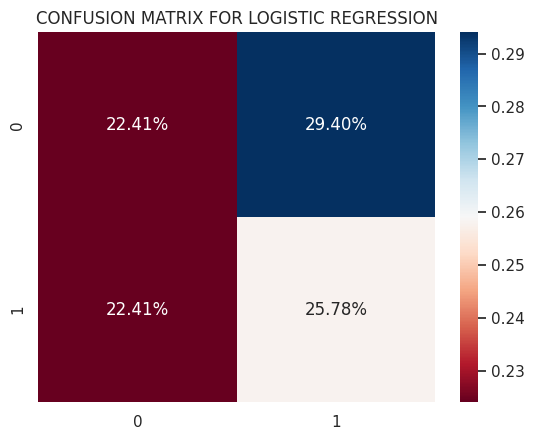

In [ ]:
LogReg_cm = confusion_matrix(y_test, LogReg_pred)
sns.heatmap(LogReg_cm / np.sum(LogReg_cm), annot=True, fmt='0.2%', cmap='RdBu')
plt.title("CONFUSION MATRIX FOR LOGISTIC REGRESSION")

### 2. **K-Nearest Neighbors (KNN) Regression - First Iteration:**

In [ ]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

KNN_pred = KNN.predict(X_test)

KNN_acc = accuracy_score(y_test, KNN_pred)
KNN_mae = mean_absolute_error(y_test, KNN_pred)
KNN_mse = mean_squared_error(y_test, KNN_pred)
KNN_rmse = np.sqrt(KNN_mse)

KNN_precision = precision_score(y_test, KNN_pred)
KNN_recall = recall_score(y_test, KNN_pred)
KNN_f1 = f1_score(y_test, KNN_pred)

In [ ]:
print("The Accuracy for K-Nearest Neighbors (KNN) is", KNN_acc)

print("The Classification Report using K-Nearest Neighbors (KNN) is:")
print(classification_report(y_test, KNN_pred))

The Accuracy for K-Nearest Neighbors (KNN) is 0.6411917098445595
The Classification Report using K-Nearest Neighbors (KNN) is:
              precision    recall  f1-score   support

           0       0.66      0.63      0.65       400
           1       0.62      0.65      0.64       372

    accuracy                           0.64       772
   macro avg       0.64      0.64      0.64       772
weighted avg       0.64      0.64      0.64       772



Text(0.5, 1.0, 'CONFUSION MATRIX FOR KNN')

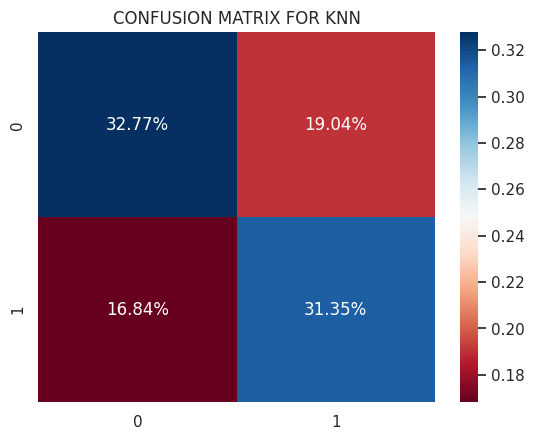

In [ ]:
KNN_cm = confusion_matrix(y_test, KNN_pred)
sns.heatmap(KNN_cm / np.sum(KNN_cm), annot=True, fmt='0.2%', cmap='RdBu')
plt.title("CONFUSION MATRIX FOR KNN")

### 3. **Decision Tree Classifier - First Iteration:**

In [ ]:
DecTree = DecisionTreeClassifier()
DecTree.fit(X_train, y_train)

DecTree_pred = DecTree.predict(X_test)

DecTree_acc = accuracy_score(y_test, DecTree_pred)
DecTree_precision = precision_score(y_test, DecTree_pred)
DecTree_recall = recall_score(y_test, DecTree_pred)
DecTree_f1 = f1_score(y_test, DecTree_pred)

In [ ]:
print("The Accuracy for Decision Tree is", DecTree_acc)

print("The Classification Report using Decision Tree is:")
print(classification_report(y_test, DecTree_pred))

The Accuracy for Decision Tree is 0.7409326424870466
The Classification Report using Decision Tree is:
              precision    recall  f1-score   support

           0       0.78      0.69      0.74       400
           1       0.71      0.79      0.75       372

    accuracy                           0.74       772
   macro avg       0.74      0.74      0.74       772
weighted avg       0.75      0.74      0.74       772



Text(0.5, 1.0, 'CONFUSION MATRIX FOR DECISION TREE')

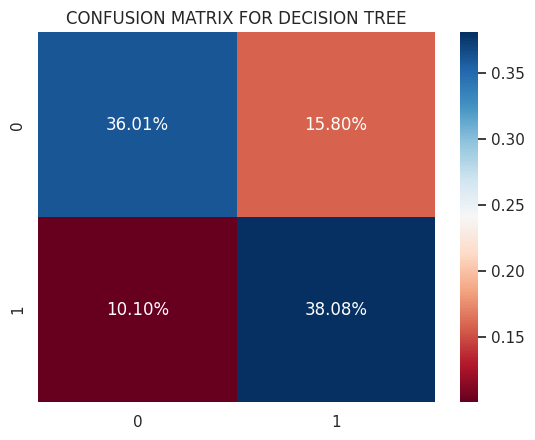

In [ ]:
DecTree_cm = confusion_matrix(y_test, DecTree_pred)
sns.heatmap(DecTree_cm / np.sum(DecTree_cm), annot=True, fmt='0.2%', cmap='RdBu')
plt.title("CONFUSION MATRIX FOR DECISION TREE")

### 4. **Random Forest Classifier - First Iteration:**

In [ ]:
RFTree = RandomForestClassifier()
RFTree.fit(X_train, y_train)

RFTree_pred = RFTree.predict(X_test)

RFTree_acc = accuracy_score(y_test, RFTree_pred)
RFTree_precision = precision_score(y_test, RFTree_pred)
RFTree_recall = recall_score(y_test, RFTree_pred)
RFTree_f1 = f1_score(y_test, RFTree_pred)

In [ ]:
print("The Accuracy for Random Forest is", RFTree_acc)

print("The Classification Report using Random Forest is:")
print(classification_report(y_test, RFTree_pred))

The Accuracy for Random Forest is 0.8354922279792746
The Classification Report using Random Forest is:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       400
           1       0.85      0.80      0.82       372

    accuracy                           0.84       772
   macro avg       0.84      0.83      0.83       772
weighted avg       0.84      0.84      0.84       772



Text(0.5, 1.0, 'CONFUSION MATRIX FOR RANDOM FOREST')

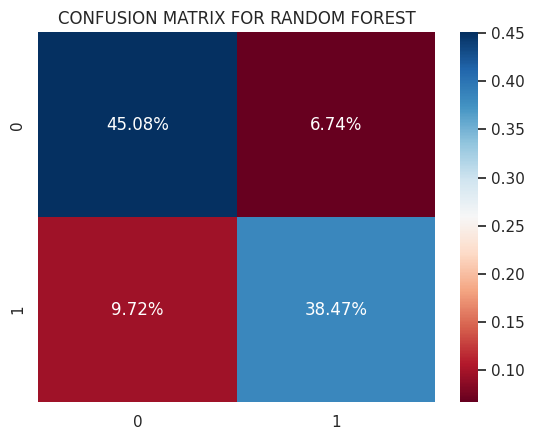

In [ ]:
RFTree_cm = confusion_matrix(y_test, RFTree_pred)
sns.heatmap(RFTree_cm / np.sum(RFTree_cm), annot=True, fmt='0.2%', cmap='RdBu')
plt.title("CONFUSION MATRIX FOR RANDOM FOREST")

### 5. **Support Vector Machine (SVM) Classifier - First Iteration:**

In [ ]:
SVM = SVC()
SVM.fit(X_train, y_train)

SVM_pred = SVM.predict(X_test)

SVM_acc = accuracy_score(y_test, SVM_pred)
SVM_precision = precision_score(y_test, SVM_pred)
SVM_recall = recall_score(y_test, SVM_pred)
SVM_f1 = f1_score(y_test, SVM_pred)

In [ ]:
print("The Accuracy for Support Vector Machine (SVM) is", SVM_acc)

print("The Classification Report using Support Vector Machine (SVM) is:")
print(classification_report(y_test, SVM_pred))

The Accuracy for Support Vector Machine (SVM) is 0.6437823834196891
The Classification Report using Support Vector Machine (SVM) is:
              precision    recall  f1-score   support

           0       0.66      0.64      0.65       400
           1       0.63      0.65      0.64       372

    accuracy                           0.64       772
   macro avg       0.64      0.64      0.64       772
weighted avg       0.64      0.64      0.64       772



Text(0.5, 1.0, 'CONFUSION MATRIX FOR SVM')

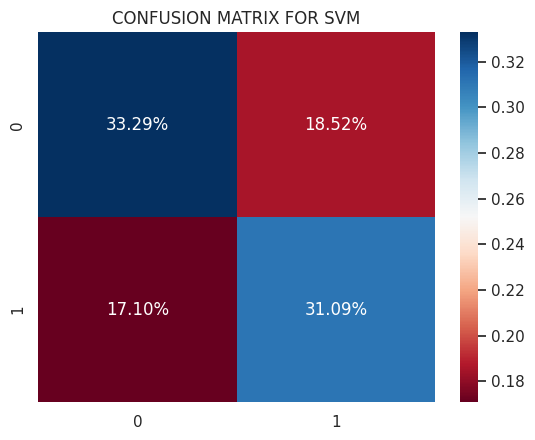

In [ ]:
SVM_cm = confusion_matrix(y_test, SVM_pred)
sns.heatmap(SVM_cm / np.sum(SVM_cm), annot=True, fmt='0.2%', cmap='RdBu')
plt.title("CONFUSION MATRIX FOR SVM")

### 6. **XGBoost Classifier - First Iteration:**

In [ ]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

XGB_pred = XGB.predict(X_test)

XGB_acc = accuracy_score(y_test, XGB_pred)
XGB_precision = precision_score(y_test, XGB_pred)
XGB_recall = recall_score(y_test, XGB_pred)
XGB_f1 = f1_score(y_test, XGB_pred)

In [ ]:
print("The Accuracy for XGBoost is", XGB_acc)

print("The Classification Report using XGBoost is:", XGB_acc)
print(classification_report(y_test, XGB_pred))

The Accuracy for XGBoost is 0.7797927461139896
The Classification Report using XGBoost is: 0.7797927461139896
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       400
           1       0.76      0.80      0.78       372

    accuracy                           0.78       772
   macro avg       0.78      0.78      0.78       772
weighted avg       0.78      0.78      0.78       772



Text(0.5, 1.0, 'CONFUSION MATRIX FOR XGBOOST')

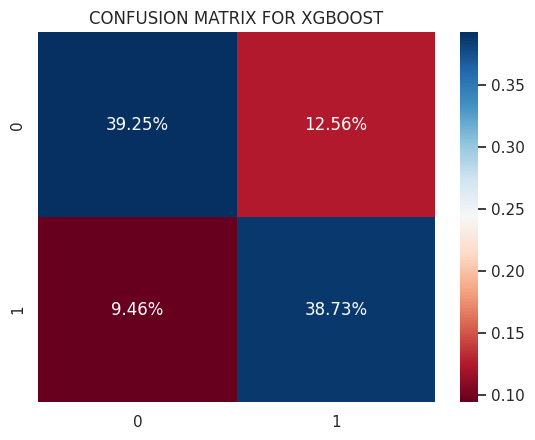

In [ ]:
XGB_cm = confusion_matrix(y_test, XGB_pred)
sns.heatmap(XGB_cm / np.sum(XGB_cm), annot=True, fmt='0.2%', cmap='RdBu')
plt.title("CONFUSION MATRIX FOR XGBOOST")

### **Model Comparison - First Iteration:**

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'XGBoost'],
    'Accuracy': [LogReg_acc, KNN_acc, DecTree_acc, RFTree_acc, SVM_acc, XGB_acc],
    'Precision': [LogReg_precision, KNN_precision, DecTree_precision, RFTree_precision, SVM_precision, XGB_precision],
    'Recall': [LogReg_recall, KNN_recall, DecTree_recall, RFTree_recall, SVM_recall, XGB_recall],
    'F1 Score': [LogReg_f1, KNN_f1, DecTree_f1, RFTree_f1, SVM_f1, XGB_f1]
})

models = models.sort_values(by='Accuracy', ascending=False)

In [ ]:
models

,Model,Accuracy,Precision,Recall,F1 Score
3,Random Forest,0.835492,0.851003,0.798387,0.823856
5,XGBoost,0.779793,0.755051,0.803763,0.778646
2,Decision Tree,0.740933,0.706731,0.790323,0.746193
4,Support Vector Machine,0.643782,0.626632,0.645161,0.635762
1,K-Nearest Neighbors,0.641192,0.622108,0.650538,0.636005
0,Logistic Regression,0.481865,0.467136,0.534946,0.498747


In [ ]:
fig = px.bar(models,
             x='Accuracy',
             y='Model',
             color='Model',
             color_continuous_scale='RdBu',
             title="INITIAL EVALUATION AND COMPARISON OF MODEL(s)")

fig.update_layout(
    title_x=0.5,
    xaxis_title='Accuracy (x)',
    yaxis_title='Model (y)',
    xaxis=dict(range=[0, 1])
)

fig.show()

### **Model Tuning:**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

lgr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False)

In [ ]:
para_lgr = {'solver': ['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear'],
            'penalty': ['l1', 'l2', 'elasticnet', 'none']}

grid_lgr = GridSearchCV(lgr, param_grid=para_lgr, cv=5)
grid_lgr.fit(X_train, y_train)

print("Optimal hyperparameters for Logistic Regression:", grid_lgr.best_params_)

Optimal hyperparameters for Logistic Regression: {'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
para_knn = {'n_neighbors': np.arange(1, 50),
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5)
grid_knn.fit(X_train, y_train)

print("Optimal hyperparameters for KNN:", grid_knn.best_params_)

Optimal hyperparameters for KNN: {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}


In [ ]:
para_dt = {'criterion': ['gini', 'entropy'],
           'max_depth': np.arange(1, 50),
           'min_samples_leaf': [1, 2, 4, 5, 10, 20, 30, 40, 80, 100]}

grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5)
grid_dt.fit(X_train, y_train)

print("Optimal hyperparameters for Decision Tree:", grid_dt.best_params_)

Optimal hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 44, 'min_samples_leaf': 1}


In [ ]:
params_rf = {'n_estimators': [100, 200, 350, 500],
             'min_samples_leaf': [2, 10, 30]}

grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)
grid_rf.fit(X_train, y_train)

print("Optimal hyperparameters for Random Forest:", grid_rf.best_params_)

Optimal hyperparameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 350}


In [ ]:
para_svc = {'C': [0.1, 1, 10, 100, 1000],
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf']}

grid_svc = GridSearchCV(svc, param_grid=para_svc, cv=5)
grid_svc.fit(X_train, y_train)

print("Optimal hyperparameters for SVM:", grid_svc.best_params_)

Optimal hyperparameters for SVM: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
params_xgb = {'n_estimators': [50, 100, 250, 400, 600, 800, 1000],
              'learning_rate': [0.2, 0.5, 0.8, 1]}

rs_xgb = RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)
rs_xgb.fit(X_train, y_train)

print("Optimal hyperparameters for XGBoost:", rs_xgb.best_params_)

Optimal hyperparameters for XGBoost: {'n_estimators': 50, 'learning_rate': 0.8}


### **Post-Hyperparameter Tuning and Model Refinement:**

### 1. **Logistic Regression - Second Iteration:**

In [ ]:
LogReg2 = LogisticRegression(penalty='l1', solver='liblinear')
LogReg2.fit(X_train, y_train)

LogReg2_pred = LogReg2.predict(X_test)

LogReg2_acc = accuracy_score(y_test, LogReg2_pred)
LogReg2_mae = mean_absolute_error(y_test, LogReg2_pred)
LogReg2_mse = mean_squared_error(y_test, LogReg2_pred)
LogReg2_rmse = np.sqrt(LogReg2_mse)

LogReg2_precision = precision_score(y_test, LogReg2_pred)
LogReg2_recall = recall_score(y_test, LogReg2_pred)
LogReg2_f1 = f1_score(y_test, LogReg2_pred)

In [ ]:
print("The Accuracy for Logistic Regression is", LogReg2_acc)

print("The Classification Report using Logistic Regression is:")
print(classification_report(y_test, LogReg2_pred))

The Accuracy for Logistic Regression is 0.483160621761658
The Classification Report using Logistic Regression is:
              precision    recall  f1-score   support

           0       0.50      0.43      0.47       400
           1       0.47      0.53      0.50       372

    accuracy                           0.48       772
   macro avg       0.48      0.48      0.48       772
weighted avg       0.49      0.48      0.48       772



Text(0.5, 1.0, 'CONFUSION MATRIX FOR LOGISTIC REGRESSION')

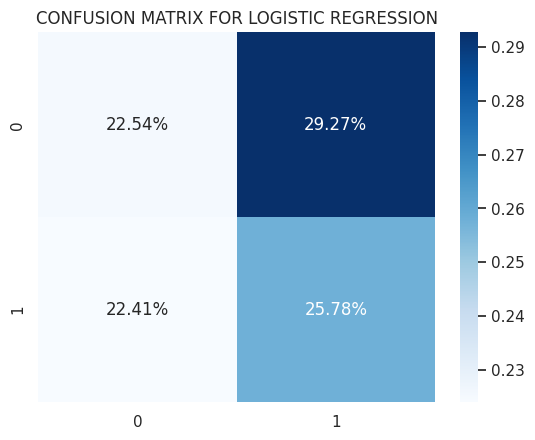

In [ ]:
LogReg2_cm = confusion_matrix(y_test, LogReg2_pred)
sns.heatmap(LogReg2_cm / np.sum(LogReg2_cm), annot=True, fmt='0.2%', cmap='Blues')
plt.title("CONFUSION MATRIX FOR LOGISTIC REGRESSION")

### 2. **K-Nearest Neighbors (KNN) Regression - Second Iteration:**

In [ ]:
KNN2 = KNeighborsClassifier(algorithm='auto', n_neighbors=1, weights='uniform')
KNN2.fit(X_train, y_train)

KNN2_pred = KNN2.predict(X_test)

KNN2_acc = accuracy_score(y_test, KNN2_pred)
KNN2_mae = mean_absolute_error(y_test, KNN2_pred)
KNN2_mse = mean_squared_error(y_test, KNN2_pred)
KNN2_rmse = np.sqrt(mean_squared_error(y_test, KNN2_pred))

KNN2_precision = precision_score(y_test, KNN2_pred)
KNN2_recall = recall_score(y_test, KNN2_pred)
KNN2_f1 = f1_score(y_test, KNN2_pred)

In [ ]:
print("The Accuracy for K-Nearest Neighbors (KNN) is", KNN2_acc)

print("The Classification Report using K-Nearest Neighbors (KNN) is:", KNN2_acc)
print(classification_report(y_test, KNN2_pred))

The Accuracy for K-Nearest Neighbors (KNN) is 0.7733160621761658
The Classification Report using K-Nearest Neighbors (KNN) is: 0.7733160621761658
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       400
           1       0.73      0.83      0.78       372

    accuracy                           0.77       772
   macro avg       0.78      0.78      0.77       772
weighted avg       0.78      0.77      0.77       772



Text(0.5, 1.0, 'CONFUSION MATRIX FOR KNN')

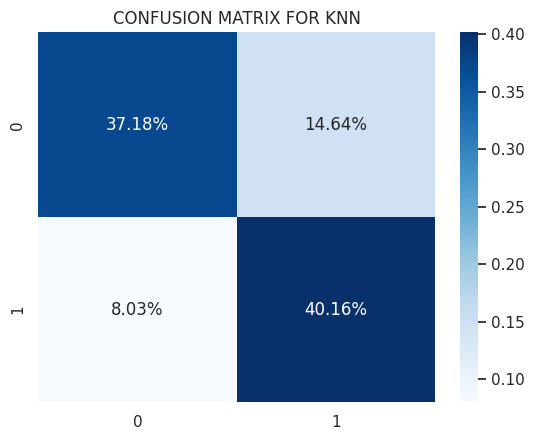

In [ ]:
KNN2_cm = confusion_matrix(y_test, KNN2_pred)
sns.heatmap(KNN2_cm / np.sum(KNN2_cm), annot=True, fmt='0.2%', cmap='Blues')
plt.title("CONFUSION MATRIX FOR KNN")

### 3. **Decision Tree Classifier - Second Iteration:**

In [ ]:
DecTree2 = DecisionTreeClassifier(criterion='entropy', max_depth=44, min_samples_leaf=1)
DecTree2.fit(X_train, y_train)

DecTree2_pred = DecTree2.predict(X_test)

DecTree2_acc = accuracy_score(y_test, DecTree2_pred)
DecTree2_precision = precision_score(y_test, DecTree2_pred)
DecTree2_recall = recall_score(y_test, DecTree2_pred)
DecTree2_f1 = f1_score(y_test, DecTree2_pred)

In [ ]:
print("The Accuracy for Decision Tree is", DecTree2_acc)

print("The Classification Report using Decision Tree is:")
print(classification_report(y_test, DecTree2_pred))

The Accuracy for Decision Tree is 0.7577720207253886
The Classification Report using Decision Tree is:
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       400
           1       0.72      0.82      0.77       372

    accuracy                           0.76       772
   macro avg       0.76      0.76      0.76       772
weighted avg       0.76      0.76      0.76       772



Text(0.5, 1.0, 'CONFUSION MATRIX FOR DECISION TREE')

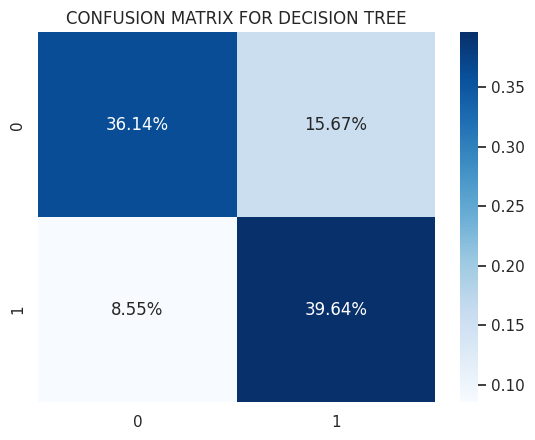

In [ ]:
DecTree2_cm = confusion_matrix(y_test, DecTree2_pred)
sns.heatmap(DecTree2_cm / np.sum(DecTree2_cm), annot=True, fmt='0.2%', cmap='Blues')
plt.title("CONFUSION MATRIX FOR DECISION TREE")

### 4. **Random Forest Classifier - Second Iteration**:

In [ ]:
RFTree2 = RandomForestClassifier(min_samples_leaf=2, n_estimators=200)
RFTree2.fit(X_train, y_train)

RFTree2_pred = RFTree2.predict(X_test)

RFTree2_acc = accuracy_score(y_test, RFTree2_pred)
RFTree2_precision = precision_score(y_test, RFTree2_pred)
RFTree2_recall = recall_score(y_test, RFTree2_pred)
RFTree2_f1 = f1_score(y_test, RFTree2_pred)

In [ ]:
print("The Accuracy for Random Forest is", RFTree2_acc)

print("The Classification Report using Random Forest is:")
print(classification_report(y_test, RFTree2_pred))

The Accuracy for Random Forest is 0.8316062176165803
The Classification Report using Random Forest is:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       400
           1       0.84      0.80      0.82       372

    accuracy                           0.83       772
   macro avg       0.83      0.83      0.83       772
weighted avg       0.83      0.83      0.83       772



Text(0.5, 1.0, 'CONFUSION MATRIX FOR RANDOM FOREST')

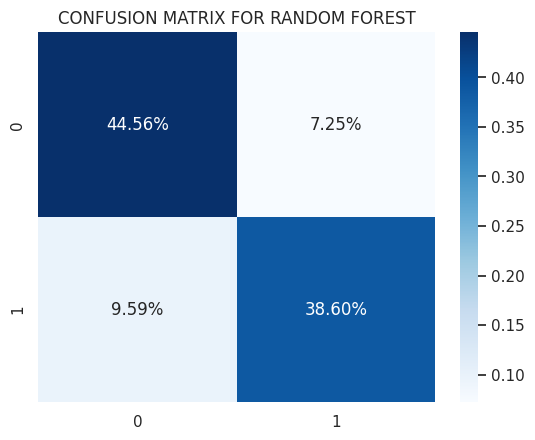

In [ ]:
RFTree2_cm = confusion_matrix(y_test, RFTree2_pred)
sns.heatmap(RFTree2_cm / np.sum(RFTree2_cm), annot=True, fmt='0.2%', cmap='Blues')
plt.title("CONFUSION MATRIX FOR RANDOM FOREST")

### 5. **Support Vector Machine (SVM) Classifier - Second Iteration:**

In [ ]:
SVM2 = SVC(C=10, gamma=1, kernel='rbf')
SVM2.fit(X_train, y_train)

SVM2_pred = SVM2.predict(X_test)

SVM2_acc = accuracy_score(y_test, SVM2_pred)
SVM2_precision = precision_score(y_test, SVM2_pred)
SVM2_recall = recall_score(y_test, SVM2_pred)
SVM2_f1 = f1_score(y_test, SVM2_pred)

In [ ]:
print("The Accuracy for Support Vector Machine (SVM) is", SVM2_acc)

print("The Classification Report using Support Vector Machine (SVM) is:", SVM2_acc)
print(classification_report(y_test, SVM2_pred))

The Accuracy for Support Vector Machine (SVM) is 0.8238341968911918
The Classification Report using Support Vector Machine (SVM) is: 0.8238341968911918
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       400
           1       0.88      0.74      0.80       372

    accuracy                           0.82       772
   macro avg       0.83      0.82      0.82       772
weighted avg       0.83      0.82      0.82       772



Text(0.5, 1.0, 'CONFUSION MATRIX FOR SVM')

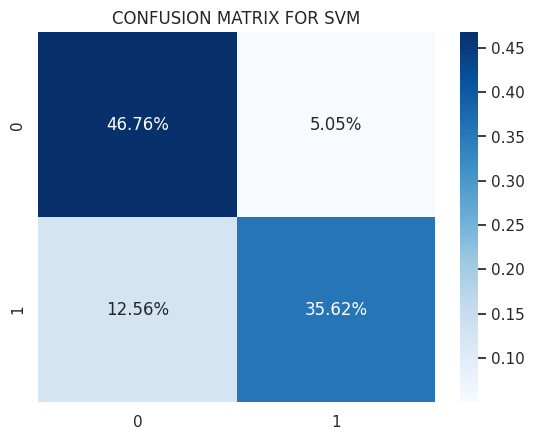

In [ ]:
SVM2_cm = confusion_matrix(y_test, SVM2_pred)
sns.heatmap(SVM2_cm / np.sum(SVM2_cm), annot=True, fmt='0.2%', cmap='Blues')
plt.title("CONFUSION MATRIX FOR SVM")

### 6. **XGBoost Classifier - Second Iteration:**

In [ ]:
XGB2 = XGBClassifier(n_estimators=600, learning_rate=0.8)
XGB2.fit(X_train, y_train)

XGB2_pred = XGB2.predict(X_test)

XGB2_acc = accuracy_score(y_test, XGB2_pred)
XGB2_precision = precision_score(y_test, XGB2_pred)
XGB2_recall = recall_score(y_test, XGB2_pred)
XGB2_f1 = f1_score(y_test, XGB2_pred)

In [ ]:
print("The Accuracy for XGBoost is", XGB2_acc)

print("The Classification Report using XGBoost is:", XGB2_acc)
print(classification_report(y_test, XGB2_pred))

The Accuracy for XGBoost is 0.7849740932642487
The Classification Report using XGBoost is: 0.7849740932642487
              precision    recall  f1-score   support

           0       0.81      0.76      0.79       400
           1       0.76      0.81      0.78       372

    accuracy                           0.78       772
   macro avg       0.79      0.79      0.78       772
weighted avg       0.79      0.78      0.79       772



Text(0.5, 1.0, 'CONFUSION MATRIX FOR XGBOOST')

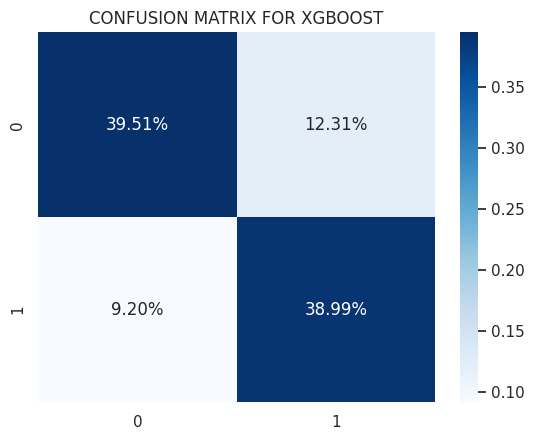

In [ ]:
XGB2_cm = confusion_matrix(y_test, XGB2_pred)
sns.heatmap(XGB2_cm / np.sum(XGB2_cm), annot=True, fmt='0.2%', cmap='Blues')
plt.title("CONFUSION MATRIX FOR XGBOOST")

### **Model Comparison - Second Iteration:**

In [ ]:
models2 = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'XGBoost'],
    'Accuracy': [LogReg2_acc, KNN2_acc, DecTree2_acc, RFTree2_acc, SVM2_acc, XGB2_acc],
    'Precision': [LogReg2_precision, KNN2_precision, DecTree2_precision, RFTree2_precision, SVM2_precision, XGB2_precision],
    'Recall': [LogReg2_recall, KNN2_recall, DecTree2_recall, RFTree2_recall, SVM2_recall, XGB2_recall],
    'F1 Score': [LogReg2_f1, KNN2_f1, DecTree2_f1, RFTree2_f1, SVM2_f1, XGB2_f1]
})

models2 = models2.sort_values(by='Accuracy', ascending=False)

In [ ]:
models2

,Model,Accuracy,Precision,Recall,F1 Score
3,Random Forest,0.831606,0.841808,0.801075,0.820937
4,Support Vector Machine,0.823834,0.875796,0.739247,0.801749
5,XGBoost,0.784974,0.760101,0.809140,0.783854
1,K-Nearest Neighbors,0.773316,0.732861,0.833333,0.779874
2,Decision Tree,0.757772,0.716628,0.822581,0.765957
0,Logistic Regression,0.483161,0.468235,0.534946,0.499373


In [ ]:
fig = px.bar(models2,
             x='Accuracy',
             y='Model',
             color='Model',
             color_continuous_scale='Blues',
             title="FINAL EVALUATION AND COMPARISON OF MODEL(s)")

fig.update_layout(
    title_x=0.5,
    xaxis_title='Accuracy (x)',
    yaxis_title='Model (y)',
    xaxis=dict(range=[0, 1])
)

fig.show()

### **Performance Comparison - Iteration 1 vs Iteration 2:**

In [ ]:
comp_iterations = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'XGBoost'],
    'Iteration 1': [LogReg_acc, KNN_acc, DecTree_acc, RFTree_acc, SVM_acc, XGB_acc],
    'Iteration 2': [LogReg2_acc, KNN2_acc, DecTree2_acc, RFTree2_acc, SVM2_acc, XGB2_acc]
})

In [ ]:
comp_iterations

,Model,Iteration 1,Iteration 2
0,Logistic Regression,0.481865,0.483161
1,K-Nearest Neighbors,0.641192,0.773316
2,Decision Tree,0.740933,0.757772
3,Random Forest,0.835492,0.831606
4,Support Vector Machine,0.643782,0.823834
5,XGBoost,0.779793,0.784974


In [ ]:
fig = px.bar(comp_iterations,
             x=['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Support Vector Machine	', 'XGBoost'],
             y=comp_iterations.columns[1:],
             labels={'x': 'Model', 'y': 'Percentage of Accuracy'},
             title="COMPARISON BETWEEN ITERATIONS")

fig.update_layout(barmode='group')

fig.show()

### **Cross Validation:**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from statistics import mean, stdev

cv = KFold(n_splits=10, random_state=1, shuffle=True)

RFTree2_scores = cross_val_score(RFTree2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
SVM2_scores = cross_val_score(SVM2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
XGB2_scores = cross_val_score(XGB2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print("Accuracy of CV - Random Forest: %.4f (%.4f)" % (mean(RFTree2_scores), stdev(RFTree2_scores)))
print("Accuracy of CV - SVM: %.4f (%.4f)" % (mean(SVM2_scores), stdev(SVM2_scores)))
print("Accuracy of CV - XGBoost: %.4f (%.4f)" % (mean(XGB2_scores), stdev(XGB2_scores)))

Accuracy of CV - Random Forest: 0.8557 (0.0131)
Accuracy of CV - SVM: 0.8788 (0.0140)
Accuracy of CV - XGBoost: 0.8132 (0.0174)


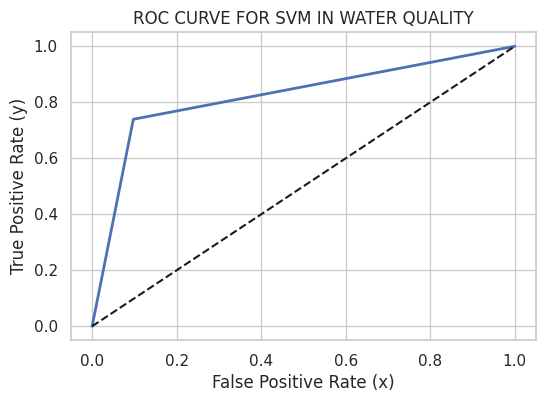

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, SVM2_pred)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.rcParams['font.size'] = 12
plt.title("ROC CURVE FOR SVM IN WATER QUALITY")
plt.xlabel('False Positive Rate (x)')
plt.ylabel('True Positive Rate (y)')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, SVM2_pred)
print("ROC AUC: {:.4f}".format(ROC_AUC))

ROC AUC: 0.8209


In [ ]:
Cross_validated_ROC_AUC = cross_val_score(SVM2, X_train, y_train, cv=10, scoring='roc_auc').mean()
print("Cross-validated ROC AUC: {:.4f}".format(Cross_validated_ROC_AUC))

Cross-validated ROC AUC: 0.8869
